# House Sale Value Prediction

In [111]:
import warnings
warnings.filterwarnings('ignore')
%autosave 5

Autosaving every 5 seconds


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets # pull Iris data
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [113]:
# Linear Regression

In [114]:
housing = pd.read_csv('house.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [116]:
housing.shape

(1460, 81)

In [117]:
# Feature engineering
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Age'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64

In [118]:
# Count houses per neighborhood and remove those with more than 30 houses
house_counts = housing['Neighborhood'].value_counts()
housing = housing.loc[housing['Neighborhood'].isin(house_counts[house_counts > 30].index)]

housing.shape

(1310, 82)

In [119]:
features = ['CentralAir', 'LotArea', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'Age']
target = 'SalePrice'

In [120]:
housing[features].head()

,CentralAir,LotArea,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
0,Y,8450,5,856,854,3,5
2,Y,11250,5,920,866,3,7
3,Y,9550,5,961,756,3,91
4,Y,14260,5,1145,1053,4,8
5,Y,14115,5,796,566,1,16


In [121]:
housing['CentralAir'].value_counts()

Y    1222
N      88
Name: CentralAir, dtype: int64

In [122]:
# One-hot encode
housing['CentralAir'] = housing['CentralAir'].map({'Y': 1, 'N': 0})

In [123]:
# One-hot encode Neighborhood
housing['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Name: Neighborhood, dtype: int64

In [124]:
dummies_nb = pd.get_dummies(housing['Neighborhood'])
dummies_nb.head()

,BrkSide,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [125]:
dummies_nb.shape

(1310, 16)

In [126]:
housing.shape

(1310, 82)

In [127]:
housing = pd.concat([housing, dummies_nb], axis = 1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0


In [128]:
features += list(dummies_nb.columns)
features

['CentralAir',
 'LotArea',
 'OverallCond',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'Age',
 'BrkSide',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'Mitchel',
 'NAmes',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'Timber']

# Modeling

In [129]:
X = housing[features]
y = housing[target]
n = housing.shape[0]

In [130]:
# Benchmark
y_mean = np.mean(y)
y_mean

180167.63358778626

In [131]:
RMSE_benchmark = np.sqrt(np.sum((y-y_mean)**2)/n)
RMSE_benchmark

78032.94485454109

In [132]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
my_lr = lr.fit(X, y)

y_pred = lr.predict(X)
housing['predictions'] = y_pred

In [133]:
RMSE =np.sqrt(np.sum((y-y_pred)**2)/n)
RMSE

35863.999270887405

Text(0, 0.5, 'Predicted')

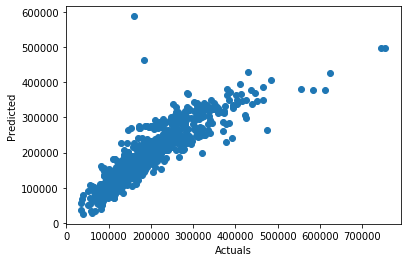

In [134]:
plt.plot(housing['SalePrice'], housing['predictions'], 'o')
plt.xlabel('Actuals')
plt.ylabel('Predicted')

In [135]:
print(f'Intercept: ', my_lr.intercept_)
print(f'Coefficients: ', my_lr.coef_)

Intercept:  13484.900792542641
Coefficients:  [ 8.30901989e+03  3.81480699e-01  1.05457712e+04  1.00464240e+02
  6.99877791e+01 -6.18849837e+03 -6.19178701e+02 -1.09143892e+04
  1.72570505e+03  1.15277053e+04 -3.04432415e+04 -5.83543253e+03
 -1.81580276e+04 -2.01590256e+04 -2.00466630e+04 -2.07223116e+04
  6.03798721e+04  7.33994661e+04 -2.35208503e+04 -2.34962391e+04
 -1.09943658e+04  1.96421874e+04  1.76156104e+04]


In [136]:
# R-sq
my_lr.score(X, y)

0.7887671589508427

In [137]:
# Log Regression

In [138]:
data = pd.read_csv('student_alc.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Low


In [139]:
data.shape

(649, 34)

In [140]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'alc'],
      dtype='object')

In [141]:
#items_to_remove = ['school', 'Pstatus', 'Medu', 'Fedu', 'alc']
#features = [item for item in  data.columns if item not in items_to_remove ]
features = ['sex', 'famsize', 'age', 'studytime', 'famrel', 'goout', 'freetime', 'G3']
target = 'alc'

In [142]:
data[features].head()

,sex,famsize,age,studytime,famrel,goout,freetime,G3
0,F,GT3,18,2,4,4,3,11
1,F,GT3,17,2,5,3,3,11
2,F,LE3,15,2,4,2,3,12
3,F,GT3,15,3,3,2,2,14
4,F,GT3,16,2,4,2,3,13


In [143]:
data['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [144]:
data['sex'] = data['sex'].map({'F': 1, 'M': 0})
data['sex'].head()

0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [145]:
data['famsize'].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [146]:
data['famsize'] = data['famsize'].map({'GT3': 1, 'LE3': 0})
data['famsize'].value_counts()

1    457
0    192
Name: famsize, dtype: int64

In [147]:
data['alc'] = data['alc'].map({'Low': 0, 'High': 1})
data['alc'].value_counts()

0    483
1    166
Name: alc, dtype: int64

In [109]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
print(y_train.shape)
print(y_test.shape)

(519,)
(130,)


In [150]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', C = 1000, penalty = 'l1', random_state = 24)
my_lr = lr.fit(X_train, y_train)

In [153]:
y_train_pred_proba = my_lr.predict_proba(X_train)
y_test_pred_proba = my_lr.predict_proba(X_test)

In [154]:
roc_auc_score(y_train, y_train_pred_proba[:,1])

0.7521128125605737

In [157]:
roc_auc_score(y_test, y_test_pred_proba[:, 1])

0.8045280612244897

In [167]:
y_train_pred = my_lr.predict(X_train)
y_test_pred = my_lr.predict(X_test)

metrics.confusion_matrix(y_train, y_train_pred)

array([[362,  23],
       [ 90,  44]], dtype=int64)

In [168]:
conf_matrix = pd.crosstab(y_train, y_train_pred)
conf_matrix

col_0,0,1
alc,,
0,362,23
1,90,44
